In [1]:
# import OPENAI_API_KEY from .env file
import os
from dotenv import load_dotenv
load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
OPENAI_MODEL_NAME = os.getenv("OPENAI_MODEL_NAME")
SERPER_API_KEY = os.getenv("SERPER_API_KEY")

In [5]:
from langchain_community.utilities import GoogleSerperAPIWrapper
search = GoogleSerperAPIWrapper()
results = search.results("Writing articles using generative AI", api_key = SERPER_API_KEY)
print(results)

{'searchParameters': {'q': 'Writing articles using generative AI', 'gl': 'us', 'hl': 'en', 'type': 'search', 'num': 10, 'engine': 'google'}, 'answerBox': {'snippet': "Use generative AI to create an outline. Let's say you want to write an article. Prompt AI by describing why you're writing it, where it will be published, who will read it, and generally what it should be about. In the same prompt, ask it to list several topic suggestions.", 'snippetHighlighted': ["Prompt AI by describing why you're writing it, where it will be published, who will read it, and generally what it should be about.", 'In the same prompt, ask it to list several topic suggestions'], 'title': 'Quick Tips on Using Generative AI for Writing - LinkedIn', 'link': 'https://www.linkedin.com/pulse/quick-tips-using-generative-ai-writing-christopher-rand-gcske', 'date': 'Dec 19, 2023'}, 'organic': [{'title': 'What we have learnt about Generative AI and journalism and how to ...', 'link': 'https://charliebeckett.medium.co

In [17]:
search2 = GoogleSerperAPIWrapper(k=20)
results2 = search2.results("Writing articles using AI", api_key = SERPER_API_KEY)
print(len(results2['organic']))

20


In [19]:
# get the list of links for each article in results2
article_links = []
for article in results2['organic']:
    article_links.append(article['link'])

In [2]:
import requests
from bs4 import BeautifulSoup

# Function to get the text from a webpage's <main> tag
def get_main_text(url):
    # Fetch the content of the webpage
    response = requests.get(url)
    
    # If the request was successful
    if response.status_code == 200:
        # Parse the HTML content
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the <main> tag
        main_content = soup.find('main')
        
        # If a <main> tag is found, extract its text
        if main_content:
            return main_content.get_text(separator='\n', strip=True)
        else:
            return "No <main> tag found on the page."
    else:
        return f"Failed to retrieve page. Status code: {response.status_code}"

# Example usage:
url = article_links[0]  # Replace with the actual URL
main_text = get_main_text(url)
print(main_text)


NameError: name 'article_links' is not defined

In [12]:
print(results2['searchParameters'])

{'q': 'Writing articles using AI', 'gl': 'us', 'hl': 'en', 'type': 'search', 'num': 10, 'engine': 'google'}


# Creating the gathering articles tool

In [45]:
from langchain_core.tools import tool
from langchain_community.utilities import GoogleSerperAPIWrapper
import requests
from bs4 import BeautifulSoup
# import datetime now
from datetime import datetime 
# Function to get the text from a webpage's <main> tag
def get_main_text(url):
    # Fetch the content of the webpage
    response = requests.get(url)
    
    # If the request was successful
    if response.status_code == 200:
        # Parse the HTML content
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the <main> tag
        main_content = soup.find('main')
        
        # If a <main> tag is found, extract its text
        if main_content:
            return main_content.get_text(separator='\n', strip=True)
        else:
            return ""
    else:
        return ""
@tool
def gather_articles(search_query: str, api_key: str) -> list:
    """A tool to gather articles from the web based on a search query"""
    now = datetime.now()
    search = GoogleSerperAPIWrapper(k=10)
    results = search.results(search_query, api_key = api_key)
    article_links = []
    article_texts = []
    # open or create a text file to store the articles and have the now time in its name
    with open(f"articles_{now}.txt", "w") as file:

        for article in results['organic']:
            text = get_main_text(article['link'])
            if text != '':
                article_links.append(article['link'])
                article_texts.append(text)
                # append the article link and text to the end of the file
                file.write(f"Link: {article['link']}\n")
                file.write(f"Text: {text}\n")
                file.write("\n")
    return article_links, article_texts

gather_articles.args_schema.schema()

{'description': 'A tool to gather articles from the web based on a search query',
 'properties': {'search_query': {'title': 'Search Query', 'type': 'string'},
  'api_key': {'title': 'Api Key', 'type': 'string'}},
 'required': ['search_query', 'api_key'],
 'title': 'gather_articles',
 'type': 'object'}

In [17]:
article_links, article_texts = gather_articles.invoke({"search_query":"Ethical use of AI", "api_key":SERPER_API_KEY})
print(article_links)

2024-10-22 23:59:15,654 - 134038179315712 - dammit.py-dammit:615 - WARNING: Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


['https://www.unesco.org/en/artificial-intelligence/recommendation-ethics', 'https://news.harvard.edu/gazette/story/2020/10/ethical-concerns-mount-as-ai-takes-bigger-decision-making-role/', 'https://www.coursera.org/articles/ai-ethics', 'https://www.captechu.edu/blog/ethical-considerations-of-artificial-intelligence', 'https://teaching.cornell.edu/generative-artificial-intelligence/ethical-ai-teaching-and-learning', 'https://c3.ai/glossary/artificial-intelligence/ethical-ai/', 'https://www.ibm.com/topics/ai-ethics', 'https://www.sap.com/resources/what-is-ai-ethics', 'https://iac.gatech.edu/featured-news/2023/08/ai-ethics', 'https://www.forbes.com/sites/bernardmarr/2021/09/10/how-do-we-use-artificial-intelligence-ethically/', 'https://legal.thomsonreuters.com/blog/how-to-responsibly-use-ai-to-address-ethical-and-risk-challenges/', 'https://en.wikipedia.org/wiki/Ethics_of_artificial_intelligence', 'https://unsceb.org/sites/default/files/2022-09/Principles%20for%20the%20Ethical%20Use%20of

In [22]:
print(article_texts[1])

Illustration by Ben Boothman
Work & Economy
Great promise but potential for peril
Christina Pazzanese
Harvard Staff Writer
October 26, 2020
long read
Ethical concerns mount as AI takes bigger decision-making role in more industries
Second in a four-part series that taps the expertise of the Harvard community to examine the promise and potential pitfalls of the rising age of artificial intelligence and machine learning
, and how to humanize them
.
For decades, artificial intelligence, or AI, was the engine of high-level STEM research. Most consumers became aware of the technology’s power and potential through internet platforms like Google and Facebook, and retailer Amazon. Today, AI is essential across a vast array of industries, including health care, banking, retail, and manufacturing.
Also in the series
Science & Tech
Trailblazing initiative marries ethics, tech
long read
Health
AI revolution in medicine
long read
Science & Tech
Imagine a world in which AI is in your home, at work, 

In [20]:
from langchain_openai import ChatOpenAI
from langchain_ollama import ChatOllama
from datetime import datetime
from langchain_core.prompts import PromptTemplate
tools = [gather_articles]
llm = ChatOpenAI(api_key=OPENAI_API_KEY, model=OPENAI_MODEL_NAME)
llm = ChatOllama(model="")
llm_with_tool = llm.bind_tools(tools)

In [21]:
from langchain_core.prompts import ChatPromptTemplate
gather_template_prompt = ChatPromptTemplate.from_template("You will receive the main idea of an article, your task is to generate a list of 5 search queries in order to gather articles that fall in the same context as the main idea given. The search queries should be diverse and different form each other. Your output should be a json list.\n Main idea: {main_idea}\n JSON list of search queries: ")

gather_template_prompt.invoke({"main_idea": "I want to write articles history of algeria"})

ChatPromptValue(messages=[HumanMessage(content='You will receive the main idea of an article, your task is to generate a list of 5 search queries in order to gather articles that fall in the same context as the main idea given. The search queries should be diverse and different form each other. Your output should be a json list.\n Main idea: I want to write articles about the ethical use of AI\n JSON list of search queries: ', additional_kwargs={}, response_metadata={})])

In [18]:
result = llm.invoke(gather_template_prompt.invoke({"main_idea": "I want to write articles about the ethical use of AI"}))

In [19]:
print(result.content)

```json
[
    "ethical implications of artificial intelligence",
    "AI ethics and responsible use of technology",
    "challenges in ethical AI development",
    "guidelines for ethical AI implementation",
    "impact of AI on privacy and data security",
    "case studies on ethical dilemmas in AI",
    "AI accountability and transparency issues",
    "societal effects of unethical AI practices",
    "best practices for ethical AI research",
    "frameworks for assessing AI ethics"
]
```


In [22]:
from langchain_core.messages import AIMessage
import re
import ast
def parse_search_queries(ai_message: AIMessage) -> str:
    """Parse the python list of search_queries from the AI message"""
        # Regex to extract text between ``` ignoring 'python'
    pattern = r"```(?:json)?([\s\S]*?)```"
    match = re.search(pattern, ai_message.content)

    if match:
        extracted_text = match.group(1)
        list = ast.literal_eval(extracted_text)

    return list

In [28]:
print(parse_search_queries(result))

['ethical implications of artificial intelligence', 'AI ethics and responsible use of technology', 'challenges in ethical AI development', 'guidelines for ethical AI implementation', 'impact of AI on privacy and data security', 'case studies on ethical dilemmas in AI', 'AI accountability and transparency issues', 'societal effects of unethical AI practices', 'best practices for ethical AI research', 'frameworks for assessing AI ethics']


In [23]:
gather_chain = gather_template_prompt | llm | parse_search_queries


In [8]:
search_queries = gather_chain.invoke({"main_idea": "I want to write articles about the ethical use of AI"})
print(search_queries)

['ethical implications of artificial intelligence', 'responsible AI development practices', 'AI ethics guidelines and frameworks', 'impact of AI on society and morality', 'case studies on ethical dilemmas in AI']


In [9]:
article = """Photo Credit:
Vlada Karpovich
/
Pexels
Blog
Social Media Marketing
8 of the Best AI Writing Tools to Help You Work Smarter, Not Harder
I’ve put dozens of AI writing tools to the test — here's a deep dive into my favorite AI writing generators and who I think they’ll be most useful for.
Apr 3, 2024
13 min read
Social Media Marketing
Kirsti Lang
Senior Content Writer @ Buffer
From brainstorming ideas, creating outlines, repurposing content — AI can make your job as a writer a whole lot easier.
Artificial intelligence is not going to do your best work for you, of course. We know there’s (thankfully?) still work to be done in replicating the weirdness and wonder of human creativity. But AI can take some of the work off your plate, so you can focus on exactly that: creating.
However, with the ever-growing list of AI software and tools on the market — all promising to help you generate, streamline, and automate your writing process — it can be tricky to figure out which ones are worth your time (and money).
Which is where I come in. I’m a productivity nerd who loves testing out new tools, and I’ve put dozens of AI writing assistants to the test in the hope of working smarter, not harder.
My ultimate goal is to remove the admin and repetition from my to-do list as a writer so I can focus on what brings me joy. (The creating part, as you may have guessed.)
In this article, I’ll take a deep dive into my favorite AI writing generators and who I think they’ll be most useful for.
Jump to a section:
Buffer’s AI Assistant
Jasper
Copy.ai
Writer
Sudowrite
Type
SEOWind
ChatGPT
Before we get into that, here is some context on how I use AI tools in my work.
How I use AI in my work
At Buffer, our approach to AI is simple: it’s a tool, not a replacement. You’ll never find completely AI-generated content on Buffer’s blog, website, or the product itself — a human reviews everything. (You can read more about
how we use AI on the content team here
.)
There are a plethora of ways to use
AI tools in your content creation
process, but here are some ways I’m using AI as a writer:
Generate ideas
Draft article outlines
Rephrase paragraphs or phrases with a specific tone
Generate sentences or paragraphs when I’m hit with writer’s block (though I’ll always fact-check, edit, or rewrite these)
Repurpose blog posts into social media posts
Write silly poems I can share for friends’ birthdays
OK, that last one doesn’t exactly count as work, but it’s one of my favorite ways to use it.
For all of the above (and a few more tasks), these are the best AI writing tools I’ve tested*.
The best AI writing tools
1. Buffer’s AI Assistant
Best AI writing tool for social media content
⚡
Get AI help writing and refining your social media posts right in Buffer.
Sign up for our forever-free plan here →
Buffer's AI Assistant was built
for
social media. You can use it as and when you create and schedule your content with Buffer, making the content creation process seamless (no more copy-pasting to various social networks — especially tedious if you’re cross-posting to multiple platforms).
The best thing about Buffer’s AI Assistant is that it understands the nuances of each social media platform. For example, the content you create for X (formerly Twitter) won’t exceed your character limit. It’s also trained to make the tone of LinkedIn content more professional, Instagram more playful, and so on.
Another time-saving feature is the editing buttons within the assistant. Instead of having to type further instructions to the Assistant to tweak your post, just click
Rephrase
,
Shorten
,
Expand
,
More casual
, or
More formal
to get you closer to the content you’re after.
You can also use these buttons to tweak certain parts of your posts if you don’t want to rewrite the whole lot — another time saver. (If you’re new to using AI in this way, this beginner’s guide to
using AI for social media
is a helpful read.)
Beyond these fundamental features, here are some of my favorite use cases as a writer looking to create more content on social media and
build my personal brand
:
Personalized ideas
In my experience as a creator and social media manager, social media writer’s block is SO much worse than the regular kind. Perhaps it’s the sheer volume of content you have to create. Who knows.
Mercifully, I’ve found Buffer’s AI Assistant, which means this is a thing of the past. When I’m stuck on what to post, I head over to Buffer’s Create Space (where I brain-dump all my post ideas) and click the
Generate Ideas
button.
To get a better sense of what is going to resonate with your audience, the assistant will ask you two things:
What is your business about?
Who is your target audience?
From there, the Assistant will generate a stream of ideas for you to assess, one at a time. On each one, you’ll be able to hit
Use it,
which will open a pre-filled post creation window, or
Try another
to regenerate
.
Repurpose other posts and content
One of the best use cases for this tool is the ability to repurpose content that has performed well or rewrite it to be more appropriate for another platform.
I often use the latter to rework posts I’ve created for LinkedIn into a Twitter thread (something that used to take me ages).
Something else I’m leaning into right now is repurposing older social media posts into something fresh. There’s a fair chance a huge chunk of my audience missed certain posts, and those who saw them likely won’t remember if they did (especially if the original post has been given a glow-up).
I also use the AI Assistant to summarize entire blog posts I’ve written into bite-sized social snippets — another thing that used to take me ages.
Free and limitless on all Buffer plans
Unlike many other AI writer tools, especially those built for social media, there’s no ‘credits’ system in place. The AI Assistant is free to use, as is Buffer (for up to three channels). When it comes to the number of
prompts
and rephrases you can submit, the limit does not exist!
⚡
Level up your social media presence with Buffer AI Assistant.
Get started here
→
Bonus: No-sign-up-required Social Media Post Creator
You don’t need to be a Buffer user to use the AI Assistant. With the
free Social Media Post Creator
, you can take the tool for a test run (or use it indefinitely) without creating an account or sharing your email address.
2. Jasper
Best AI writing tool for Marketing teams
As one of the first AI writing tools to market (then known as Jarvis),
Jasper
has had time to hone its UI and feature set.
Along with AI text generation for a plethora of specific projects — everything from landing pages to full-on marketing campaigns, Jasper also boasts Remix (a dedicated tool for reworking content via a link, uploaded document, or text), Chat (a back-and-forth chat box with the AI to help you brainstorm or hone ideas), plus a Chrome extension.
Jasper has moved beyond just copywriting and now aims squarely at marketing teams. The collaborative features mean everyone can jump into various documents and view projects and campaigns at a glance with nifty Kanban and calendar views. Managers and editors can also add in things like brand voice and style guide documents to ensure things stay on track across all content pieces.
When writing, Jasper’s intuitive system will ask you to enter a simple prompt or choose from a list of templates. From there, you’ll be asked for more information upfront, which differs depending on what you’re working on. Before generating your draft, you can add things like your target audience, specific points to include, and more — but the AI can predict these things so well that this usually just involves choosing from some recommended options.
While Jasper is intuitive and great for teams, it’s worth noting that the foundation of the tool is the same as most of the other (cheaper) options on this list. Jasper “uses over a dozen language models,” but the marketing copy generated is similar to what you’ll get from ChatGPT and other AI writing software.
Pricing: 7-day trial, then prices start at $49 per month
3. Copy.ai
Best AI writing tool for automating repetitive writing tasks
Copy.ai
is another tool on this list that has outgrown the content generation mold it was born into. The multifaceted tool aims to help Sales and Marketing teams go from “go-to-market bloat to velocity.”
What that means in practice is a slick tool a lot like Jasper. However, Copy.ai places more emphasis on repeatable workflows that will help save marketers (or salespeople) time — think “repurpose this blog post into a LinkedIn post,” “Check this copy for plagiarism,” or “Find prospects at company X.”
You can choose these workflows from an impressive library or customize your own. The finished product will look something like a flowchart, where each step in the process is effectively an AI prompt (or a series of them).
If you’re not bothered with workflows, you can jump straight into Chat, their AI content generator. It’s a lot like the usual prompt-and-generate system most AI tools use and requires lots of context to generate what you’re looking for — which is why you might be better off getting the hang of the workflow system.
Like Jasper, you can have Copy.ai assess your content to match your tone and style.
Pricing: Free version with limited features, paid plans starting at $49 per month
.
4. Writer
Best AI writing tool for editing and improving your content
Writer
is a whole lot more than a simple AI text generator. Like Jasper and Copy.ai, the web tool is packed with more powerful features that take the tool beyond what ChatCPT can do — but instead of workflows and systems, they’re called ‘Apps.’
These apps, all baked into the web application, are things like ‘Blog Builder’ (which will help you spin a blog post up out of a headline idea), ‘Recaps’ (to convert a recording into a summary of key takeaways), and ‘Ask Writer’ (the chat-style prompt-and-generate AI system you’ll be familiar with). You’ll also find apps to help you create product descriptions, push notifications, and help center articles.
It’s a neat and tidy system that’s a lot easier to get to grips with than Jasper and Copy.ai, and is squarely aimed at writers rather than marketers or sales folk. Writer’s interface, for example, looks a lot like Grammarly. Here, you’ll see suggestions for improving grammar and readability, a plagiarism checker, and recommendations for improving language inclusivity.
Writer is also a solid option for content teams, with a helpful terms list where you can save all your unique terms and saved snippets for copy you reuse often. You can also set specific punctuation rules, which is a helpful time saver for editors. Writing is one of my favorite tools for proofreading and editing existing content.
What sets Writer apart from the other copywriting tools on the market is that it’s not built on GPT or other (sometimes controversial) AI models. Writer uses its own Palmyra Language Learning Models, specifically “trained for business writing and business use cases,” offering higher security and transparency. For example, Writer says Palmyra does not store your proprietary data for training its foundational models.
That said, many of Writer’s most powerful tools — like the ability to add your own brand and style guide — are locked behind its enterprise-level paywall.
Pricing: 14-day free trial, then prices start at $18 per month. (There is a free plan, but it doesn’t allow much beyond text editing.)
5. Sudowrite
Best AI writing tool for creative writing and fiction
If, like me, you’ve been threatening to write a novel for years,
Sudowrite
may soon become your new best friend. Not only will Sudowrite help you generate ideas and write stories for the characters you’ve had floating around in your head for years, but it’s also an AI-powered project management tool of sorts specifically designed for fiction writers.
As for the writing itself, you’ll start by entering the genre of your masterpiece-in-progress, then get cracking on the draft. Instead of entering a prompt, start by entering what you have. With a few sentences to start a chapter, click the ‘Write’ button, and the AI generator will suggest several options to keep moving the story forward. Highlight a word or phrase and hit ‘Describe’ to generate a description of the object based on each of the senses or a metaphor.
There’s also a ‘Rewrite’ button to help you paraphrase or rework something and a ‘Brainstorm’ button to help get your creative juices flowing in specific directions, from characters to world-building to plot points.
If you’re not ready to jump right into chapter 1, you might want to play around with Sudowrite’s Story Engine, a space where you can go into more detail about your genre, characters, and outline, add more writing samples to help the AI match your style or just brain dump ideas.
Then there’s Sudowrite’s Canvas – a space for mind mapping your (and the AI’s) imaginings to give you a bird’s-eye view (and keep track of) the story you’re creating.
Sudowrite also boasts a handy Google Docs extension so you can work where you write best and a bustling Slack community of other Sudowrite users so you can bounce ideas off of humans from time to time.
Pricing: Credit-based free trial (for a certain amount of words generated), then prices start at $10 per month
6. Type
Best AI writing tool for a simple AI writing assistant
Type
describes itself as an AI-first document editor. With the tool, you can create short and long-form content, from emails to YouTube scripts to cover letters.
The interface — clean and user-friendly — requires you to begin with a simple prompt to get you started. There’s a template library to tap into, which is handy for those moments when you just can’t face staring at a blank page (we’ve all been there). From there, Type will generate a high-quality content draft, which you’re then encouraged to play with and make your own.
Type’s generative AI makes it really easy to do this with a host of different options — for example, you can switch between OpenAI’s GPT-4 and Anthropic’s Claude 3. “Claude tends to be more creative and expressive but not quite as good at complex reasoning, whereas the GPT models are often much better at reasoning, but maybe a bit drier with tone,” Type Founder Stew Fortier explains in an onboarding video.
There’s also the ‘What to write about next’ block, a handy springboard for anything you might want to add. The sidebar contains a list of suggestions related to whatever you’re working on that you can use to generate another paragraph. In the main editor, you can also- highlight specific sentences, paragraphs, or phrases and ask Type to rework them for you.
All the common options are available, but ‘Custom transform’ is particularly handy, allowing you to ask the AI to do something really specific with your highlighted text.
Pricing: 14 days free, then $29.00 per month.
7. SEOWind
Best AI writing tool for SEO content briefs
SEOWind
is not a multi-purpose tool like many of the others on this — it’s laser-focused
SEO (search-engine optimized)
content, making it a great tool for content marketing.
As such, SEOWind doesn’t ask you to enter a prompt to kick-start your writing but a primary search term. From there, it’ll jump you to a fascinating dashboard that analyzes blog posts and pages already ranking for this term to help you create your ‘brief.’
In this build-you-brief dashboard, you’ll see a competitor analysis (an overview of blog posts and pages already ranking in Google for your term), competitor outlines (the structure of their content), and questions to answer (related queries pulled from Google, Quora and Reddit). Along with this, the tool recommends the ideal word count, the number of headings, and even the number of images to include.
With this information at your fingertips, you can set about pulling bits and pieces to create your own brief, from which SEOWind’s AI will generate a draft for you to download in your format of choice — from there, you’re left to edit the article on your own. While SEOWind makes briefs super customizable, there’s no way to edit and rework with AI once your draft is generated.
All briefs are saved within projects, where SEOWind encourages you to add details about your brand tone, details about your company and products, and even integrates with Google Search Console to help you find internal linking opportunities (one of the more tedious tick-boxes in SEO writing for sure!).
Pricing: 7-day trial, then prices start at $59 per month.
8. ChatGPT
Best free AI writing tool
You might be surprised to find
ChatGPT
in and amongst some of its more niche competitors, but I’d be remiss not to mention it here. As a free AI writing tool (for GPT-3, at least), ChatGPT is one I keep returning to for quick ideas, blog post outlines, and goofy metaphors.
ChatGPT, a chatbot based on Open AI’s GPT model, is what many of the bells-and-whistle-filled tools above are built on and what helps generate the copy that lands in their fancy interfaces.
Learning to prompt ChatGPT takes some doing — I tend to err on the side of providing as much context as possible — but the chat-style interface can be helpful as you refine your ask and tweak prompts as you go.
Pricing: Free for the basic version, with paid plans starting at $10 per month
More AI writing tools to try?
While I’ve tested many AI writing generators, I’m not an AI myself and, as such, can’t test them all. (In case you’re wondering, that cheesy simile was all mine.)
If there’s a tool out there that I have to put through its paces, I’d love to hear about it! Please comment below or tag @buffer or @bufferapp on all major social channels, and I’ll put your favorite tool to the test.
Brought to you by
Try Buffer for free
140,000+ small businesses like yours use Buffer to build their brand on social media every month
Get started now
Related Articles
Flow
Oct 22, 2024
14 Must-Try AI Social Media Content Creation Tools in 2024
Learn how to leverage AI social media content creation tools and save valuable time in your social media marketing efforts.
Akshita Sharma
Threads
Oct 21, 2024
How to Get More Followers on Threads: 9 Tactics to Help You Grow
Tried and tested strategies for growing your following on Threads, with insider tips from the Threads team.
Kirsti Lang
Flow
Oct 17, 2024
3 Nonprofit Marketing Tactics That Every Small Business Should Try
Learn three nonprofit marketing tactics for your small business.
Brittany Wren
140,000+ people like you use Buffer to build their brand on social media every month
Get started now
"""

In [24]:
summary_template_prompt = ChatPromptTemplate.from_template("You will receive the text of an article. Summarize it by keeping only the most important ideas in the form of bullet points. Each idea should be a direct, informative and factual sentence, not mentioning the author. Your output should be only a detailed list of bullet points highlighting key points from the text. Don't use titles and complexe bullet points, but instead simple bullet points\nArticle text: {article_text}\n Summary in the form of a list of bullet points: ")

summary_template_prompt.invoke({"article_text": article})


ChatPromptValue(messages=[HumanMessage(content="You will receive the text of an article. Summarize it by keeping only the most important ideas in the form of bullet points. Each idea should be a direct, informative and factual sentence, not mentioning the author. Your output should be only a detailed list of bullet points highlighting key points from the text. Don't use titles and complexe bullet points, but instead simple bullet points\nArticle text: \n Summary in the form of a list of bullet points: ", additional_kwargs={}, response_metadata={})])

In [36]:
print(llm.invoke(summary_template_prompt.invoke({"article_text": article})).content)

- AI writing tools can assist writers by brainstorming ideas, creating outlines, and repurposing content.
- AI is a tool to enhance productivity, not a replacement for human creativity.
- Buffer’s AI Assistant is ideal for social media content creation, offering features tailored to different platforms.
- Jasper is designed for marketing teams, providing collaborative features and a variety of templates for different projects.
- Copy.ai automates repetitive writing tasks and emphasizes workflow systems for efficiency.
- Writer focuses on editing and improving content with features tailored for business writing, including a plagiarism checker.
- Sudowrite is aimed at fiction writers, offering tools for idea generation, story development, and project management.
- Type is an AI-first document editor suitable for various content types, allowing users to choose different AI models to generate text.
- SEOWind specializes in creating SEO content briefs, analyzing competitor content to guide 

In [25]:
from langchain_core.messages import AIMessage
import re
import ast
def parse_article_ideas(ai_message: AIMessage) -> str:
    """Parse the bullet points list of ideas summarized of an article from the AI message"""
        # Regex to extract text between ``` ignoring 'python'
    bullet_points_list = [line.strip('- ').strip() for line in ai_message.content.splitlines() if line.strip()]


    return bullet_points_list



In [ ]:
parse_article_ideas(llm.invoke(summary_template_prompt.invoke({"article_text": article})))

In [12]:
summary_article_chain = summary_template_prompt | llm | parse_article_ideas


In [41]:
summary_article_chain.invoke({"article_text": article})

['AI writing tools can assist writers in brainstorming ideas, creating outlines, and repurposing content.',
 'AI serves as a tool to streamline the writing process, allowing writers to focus on creativity.',
 'Buffer’s AI Assistant is designed specifically for social media content, understanding platform nuances and offering editing features.',
 'Jasper is ideal for marketing teams, providing collaborative features and templates for various projects.',
 'Copy.ai automates repetitive writing tasks and offers customizable workflows for sales and marketing teams.',
 'Writer focuses on editing and improving content, offering features like plagiarism checks and suggestions for inclusivity.',
 'Sudowrite is tailored for creative writing, helping fiction writers generate ideas and manage projects.',
 'Type is a user-friendly document editor for creating various types of content, with options for different AI models.',
 'SEOWind specializes in SEO content briefs, analyzing competitor content t

In [13]:
print(search_queries)

['ethical implications of artificial intelligence', 'responsible AI development practices', 'AI ethics guidelines and frameworks', 'impact of AI on society and morality', 'case studies on ethical dilemmas in AI']


In [26]:
article_links, article_texts = gather_articles.invoke({"search_query": search_queries[2], "api_key": SERPER_API_KEY})

In [27]:
print(article_texts)

["Search\nQuick links:\nUNESCO action in Ukraine\nWorld Heritage\nBreadcrumb\nArtificial Intelligence\nShutterstock\nArtificial Intelligence\nHome\nEthics of AI\nAI in Education\nAI & inclusion\nDigital Inclusion\nDigital Policy, Capacities and Inclusion\nWomen’s access to and participation in technological developments\nDigital Capacity Building\nDigital Policy, Capacities and Inclusion\nInternet Universality Indicators\nResources\nAll publications\nRecommendation on the Ethics of AI\nReport on ethics in robotics\nMap of emerging AI areas in the Global South\n7 minutes to understand AI\nPreliminary study\nOn the ethics of AI\nOn a possible normative instrument for the ethics of AI\nOn technical and legal aspects of the desirability of a standard-setting instrument for AI ethics\nEthics of Artificial Intelligence\nThe Recommendation\n© Getty Images / ivanastar\nGlobal AI Ethics and Governance Observatory\nGetting AI governance right is one of the most consequential challenges of our ti

In [28]:
bag_of_ideas = []
for query in search_queries:
    print("search_query:", query)
    article_links, article_texts = gather_articles.invoke({"search_query": query, "api_key": SERPER_API_KEY})
    print("article_links:", article_links)
    for article in article_texts:
        bullet_points_article_summary = summary_article_chain.invoke({"article_text": article})
        print("bullet_points_article_summary:", bullet_points_article_summary)
        bag_of_ideas.extend(bullet_points_article_summary)
    print(bag_of_ideas)
print(bag_of_ideas)


search_query: ethical implications of artificial intelligence
article_links: ['https://news.harvard.edu/gazette/story/2020/10/ethical-concerns-mount-as-ai-takes-bigger-decision-making-role/', 'https://www.unesco.org/en/artificial-intelligence/recommendation-ethics/cases', 'https://www.princetonreview.com/ai-education/ethical-and-social-implications-of-ai-use', 'https://annenberg.usc.edu/research/center-public-relations/usc-annenberg-relevance-report/ethical-dilemmas-ai', 'https://www.forbes.com/sites/eliamdur/2024/01/24/6-critical--and-urgent--ethics-issues-with-ai/', 'https://www.microsoft.com/en-us/microsoft-365-life-hacks/writing/ethical-implications-of-artificial-intelligence']
bullet_points_article_summary: ['Artificial intelligence (AI) is increasingly integrated into various industries, including healthcare, banking, retail, and manufacturing.', 'AI promises improvements in efficiency, cost reduction, and accelerated research but raises concerns about societal harm and lack of o

In [36]:
# import StrOutputParser
from langchain_core.output_parsers import StrOutputParser
outline_template_prompt = ChatPromptTemplate.from_template(
    """You will receive a bag of ideas, which is a large list of concepts and thoughts. Your task is to create an outline of an article in markdown format based on the context and themes of the provided ideas. Group similar ideas into sections, avoid repetition, and ensure the outline flows logically. The final output should be a concise, well-structured outline, avoiding redundancy.
Follow this example format:
# Title of the Article
# Introduction
    -idea1
    -idea2
    ...
# Section1
Bag of ideas: {bag_of_ideas}\nOutline in markdown format: """
)

def parse_markdown(ai_message: AIMessage) -> dict:
    # Remove the first and last triple backticks ```markdown and ```
    markdown_text = ai_message.content.strip('```').strip()

    # Find the main title (text after #)
    title_match = re.search(r'^# (.+)', markdown_text)
    title = title_match.group(1).strip() if title_match else None

    # Find all sections (starting with ##) and their content
    sections = {}
    section_matches = re.split(r'^## ', markdown_text, flags=re.MULTILINE)

    # Process sections and extract their content
    for section in section_matches[1:]:  # skip the content before the first ##
        # Split section header and the rest of the content
        section_header, *section_content = section.split('\n', 1)
        section_header = section_header.strip()
        section_content = section_content[0].strip() if section_content else ''
        
        # Store the section content
        sections[section_header] = section_content
    
    # Construct the final dictionary
    result = {
        'title': title,
        'sections': sections
    }

    return result


outline_article_chain = outline_template_prompt | llm | parse_markdown



In [43]:
len(bag_of_ideas)

392

In [44]:
bag_of_ideas[19]

"UNESCO's Recommendation on the Ethics of Artificial Intelligence aims to minimize gender bias in AI development and use."

In [37]:
outline = outline_article_chain.invoke({"bag_of_ideas": bag_of_ideas})


In [55]:
print(article_texts[4])

Case Study: Ethical Dilemmas in AI
Report this article
ScaleBuild AI
ScaleBuild AI
Build and Scale
Published Aug 18, 2023
+ Follow
Table of Contents:
Introduction: Ethics in AI Landscape
Background: The Rise of AI in Society
Ethical Dilemma: Autonomous Vehicles
Ethical Dilemma: AI in Recruitment
Ethical Dilemma: Predictive Policing
Lessons Learned and Ethical Framework Suggestions
Conclusion
Introduction: Ethics in AI Landscape
The world of Artificial Intelligence (AI) offers vast potential for innovation. However, with its growth, we face new ethical dilemmas. As machines make more decisions for us, we must ask: Are they making the right decisions?
Background: The Rise of AI in Society
From smartphones to healthcare, AI has rapidly integrated into our daily lives. This case study will delve into three notable instances where AI's decision-making raised eyebrows and posed ethical challenges.
Ethical Dilemma: Autonomous Vehicles
Scenario: An autonomous car is faced with an unavoidable c

In [72]:
outline['sections']

{'Introduction': '- Overview of the rapid integration of AI into various industries.\n- Importance of addressing ethical challenges and societal implications.\n- The need for a responsible approach to AI development.',
 'Section 1: The Rise of AI in Various Industries': "- AI's applications in healthcare, banking, retail, and manufacturing.\n- Projected global business spending on AI and its implications for industry transformation.\n- Opportunities for small businesses to leverage AI for better insights.",
 'Section 2: Benefits and Risks of AI': '- Promises of AI: efficiency improvements, cost reduction, and accelerated research.\n- Potential societal harms and concerns about job displacement.\n- The debate on job elimination vs. job creation in the age of AI.',
 'Section 3: Ethical Concerns Surrounding AI': '- Issues of data bias, privacy, and algorithmic transparency.\n- The potential for discrimination in hiring, lending, and law enforcement.\n- Ethical dilemmas in healthcare appli

In [75]:
for title, text in outline['sections'].items():
    print(f"Title: {title}\nText: {text}\n")
    print(type(text))


Title: Introduction
Text: - Overview of the rapid integration of AI into various industries.
- Importance of addressing ethical challenges and societal implications.
- The need for a responsible approach to AI development.

<class 'str'>
Title: Section 1: The Rise of AI in Various Industries
Text: - AI's applications in healthcare, banking, retail, and manufacturing.
- Projected global business spending on AI and its implications for industry transformation.
- Opportunities for small businesses to leverage AI for better insights.

<class 'str'>
Title: Section 2: Benefits and Risks of AI
Text: - Promises of AI: efficiency improvements, cost reduction, and accelerated research.
- Potential societal harms and concerns about job displacement.
- The debate on job elimination vs. job creation in the age of AI.

<class 'str'>
Title: Section 3: Ethical Concerns Surrounding AI
Text: - Issues of data bias, privacy, and algorithmic transparency.
- The potential for discrimination in hiring, lendi

In [63]:
expanded_section_prompt = ChatPromptTemplate.from_template(
"""You will receive a section title and a list of main ideas that you need to expand in paragraphs only. Your task is to create a detailed expansion of the section in markdown format. You can use only paragraphs. Don't make a conclusion. Use your knowledge and the additional context presented.

Section Text {section_text}
Additional Context: {context}

Detailed section in markdown format without a conclusion:
"""
)


In [64]:
section_text = f"""{list(outline['sections'].keys())[1]}
{outline['sections'][list(outline['sections'].keys())[1]]}"""
print(section_text)

Section 1: The Rise of AI in Various Industries
- AI's applications in healthcare, banking, retail, and manufacturing.
- Projected global business spending on AI and its implications for industry transformation.
- Opportunities for small businesses to leverage AI for better insights.


In [65]:
import bs4
from langchain import hub
from langchain_chroma import Chroma
from langchain_community.document_loaders import TextLoader
from langchain_core.runnables import RunnablePassthrough
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

# Load, chunk and index the contents of the blog.
loader = TextLoader("/home/azzedine/Projects/AI_writer/articles_dump.txt")
docs = loader.load()

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)
vectorstore = Chroma.from_documents(documents=splits, embedding=OpenAIEmbeddings())

# Retrieve and generate using the relevant snippets of the blog.
retriever = vectorstore.as_retriever()



def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)


expand_rag_chain = (
    {"context": retriever | format_docs, "section_text": RunnablePassthrough()}
    | expanded_section_prompt
    | llm
    | StrOutputParser()
)
section_text = f"""{list(outline['sections'].keys())[1]}
{outline['sections'][list(outline['sections'].keys())[1]]}"""
section = expand_rag_chain.invoke(section_text)
print(section)

# The Rise of AI in Various Industries

The impact of artificial intelligence (AI) is permeating multiple sectors, revolutionizing the way businesses operate and deliver services. In healthcare, AI technologies are being deployed to enhance diagnostic accuracy, improve treatment protocols, and streamline patient care. For instance, machine learning algorithms analyze vast datasets, identifying patterns that assist in diagnosing diseases earlier and more reliably than traditional methods. AI-driven tools enable personalized medicine, tailoring treatments to individual patients based on genetic information and lifestyle factors. Furthermore, robotic process automation in administrative tasks allows healthcare professionals to focus more on patient interaction rather than bureaucratic functions, thus improving overall patient satisfaction and outcomes.

In the banking sector, AI is reshaping customer service and fraud detection. Banks are utilizing chatbots powered by natural language pro

In [76]:
# check if there is empty values in outline['sections']
empty_values = [k for k, v in outline['sections'].items() if v == '']
print(empty_values)

[]


In [ ]:
# call the expansion chain for each section in the outline
# TODO


In [69]:
enhance_template = ChatPromptTemplate.from_template(
"""You will receive a draft of an article that you need to enhance and improve its writing.
Enhancement list:
- Reduce repetition
- Reduce redundancy
- Direct, professional and human tone
- Avoid saying blend and obvious things
- Don't over explain things

Draft Article: {draft}

Revised and enhanced version of the article:
"""
)
enhance_article_chain = enhance_template | llm | StrOutputParser()
draft = """Ethics and AI: Navigating the Moral Landscape of Artificial Intelligence
As artificial intelligence (AI) becomes increasingly integrated into various sectors—from healthcare and finance to education and law enforcement—the ethical implications surrounding its development and use have become a subject of intense debate. AI has the potential to reshape society, but this power also brings complex ethical questions regarding bias, accountability, transparency, privacy, and the future of work.

The Promise of AI: Benefits Across Industries
AI offers transformative benefits across numerous industries. In healthcare, AI-driven tools assist in medical diagnostics, predicting disease outbreaks, and improving patient care. In finance, algorithms help assess creditworthiness, automate trading, and manage risks. In retail, AI enhances supply chain efficiency and personalized marketing.

However, these advancements are not without ethical concerns. As AI systems become more autonomous, the need for ethical guidelines to ensure responsible use becomes crucial.

Key Ethical Concerns in AI
1. Bias and Discrimination
One of the most pressing concerns about AI is the potential for bias and discrimination. AI systems learn from data, and if that data reflects societal biases, the system may replicate and even amplify those biases. For example, AI used in hiring practices may discriminate based on gender or race if the training data reflects historical inequalities. In law enforcement, AI-driven tools may disproportionately target minority communities, exacerbating existing social injustices.

To combat this, developers must ensure that AI systems are trained on diverse datasets and regularly audited for fairness. Transparency in AI decision-making processes, or "explainability," is also vital for identifying and correcting biases.

2. Privacy and Data Security
AI systems rely on vast amounts of data to function effectively. This raises significant concerns regarding privacy and data security. Personal data, such as medical records or social media activity, is often used to train AI systems, creating a potential risk of misuse or unauthorized access. Furthermore, many AI applications, such as facial recognition, can infringe on individual privacy.

The challenge lies in balancing the benefits of data utilization with the protection of individual privacy rights. Ethical AI development should prioritize data protection measures, including anonymization techniques and adherence to data privacy laws like GDPR.

3. Accountability and Transparency
When AI systems make decisions—whether approving loans, diagnosing medical conditions, or guiding autonomous vehicles—who is responsible for the outcomes? Accountability becomes a complex issue when humans are no longer directly involved in the decision-making process. Furthermore, many AI algorithms are "black boxes," meaning their decision-making processes are opaque even to their developers.

To address these challenges, it is crucial to implement transparent AI systems that allow for clear oversight and accountability. Explainability, where the workings of the AI can be understood and questioned, should be a priority, particularly in high-stakes applications like criminal justice or healthcare.

Regulatory Landscape and Ethical Guidelines
1. Current State of AI Regulation
The regulatory landscape for AI is still evolving. While some countries, like the United States, rely on self-regulation by the AI industry, others, such as the European Union, are taking a more proactive approach. The EU’s AI Act proposes strict regulations on AI applications, particularly those that pose significant risks to privacy, safety, and fundamental rights. However, globally, there is no unified standard, and this lack of consistency can lead to ethical dilemmas.

2. Proposed Ethical Guidelines
There is a growing consensus that interdisciplinary collaboration between technologists, ethicists, and policymakers is essential to developing ethical AI systems. Various organizations, including UNESCO, have proposed ethical guidelines that emphasize transparency, fairness, and accountability. These guidelines encourage AI developers to integrate ethical considerations from the earliest stages of development.

The Future of Work and AI
1. Job Displacement and Creation
AI is expected to transform the workforce, automating repetitive tasks while creating new opportunities in AI development and maintenance. However, the fear of job displacement looms large, particularly for workers in industries vulnerable to automation, such as manufacturing or transportation. This raises questions about social equity, as not all workers will have the same access to retraining and education programs that would allow them to thrive in an AI-driven economy.

2. Human-AI Collaboration
Rather than replacing human workers, many believe that the future of AI will involve human-AI collaboration. AI systems can assist workers by automating routine tasks, leaving humans to focus on more creative, complex, and value-driven work. For instance, in healthcare, AI can handle data analysis while doctors focus on patient care and treatment strategies.

Conclusion: Embedding Ethics in AI Development
As AI continues to advance, its ethical implications must remain at the forefront of its development. Embedding ethical considerations—such as fairness, accountability, and privacy—into AI systems is essential to ensure that they benefit society as a whole. Policymakers, developers, and users must collaborate to build an AI future that prioritizes humanity and safeguards fundamental rights. The ongoing dialogue and cooperation among stakeholders will be key to shaping an ethical AI landscape."""

In [70]:
enhanced_article = enhance_article_chain.invoke({"draft": draft})


first=ChatPromptTemplate(input_variables=['draft'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['draft'], input_types={}, partial_variables={}, template="You will receive a draft of an article that you need to enhance and improve its writing.\nEnhancement list:\n- Reduce repetition\n- Reduce redundancy\n- Direct, professional and human tone\n- Avoid saying blend and obvious things\n- Don't over explain things\n\nDraft Article: {draft}\n\nRevised and enhanced version of the article:\n"), additional_kwargs={})]) middle=[ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7d23959a3d00>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7d2395aebb50>, root_client=<openai.OpenAI object at 0x7d23959a1720>, root_async_client=<openai.AsyncOpenAI object at 0x7d23959a25f0>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))] last=StrOutputParse

In [71]:
print(enhanced_article)

# Ethics and AI: Navigating the Moral Landscape of Artificial Intelligence

As artificial intelligence (AI) becomes increasingly integrated into sectors such as healthcare, finance, education, and law enforcement, the ethical implications of its development and use have sparked significant debate. While AI has the potential to reshape society, it also raises complex ethical questions regarding bias, accountability, transparency, privacy, and the future of work.

## The Promise of AI: Transformative Benefits Across Industries

AI offers remarkable benefits across numerous fields. In healthcare, AI-driven tools enhance medical diagnostics, predict disease outbreaks, and improve patient care. In finance, algorithms assess creditworthiness, automate trading, and manage risk. In retail, AI streamlines supply chain efficiency and tailors marketing strategies.

However, these advancements come with ethical challenges. As AI systems gain autonomy, establishing ethical guidelines for their resp

In [ ]:
# iterate of the sections and print the content
for section in outline['sections']:
    

In [ ]:
import concurrent.futures

def process_query(query):
    # Function to process a single query
    article_links, article_texts = gather_articles.invoke({"search_query": query, "api_key": SERPER_API_KEY})
    summary_list = []
    for article in article_texts:
        bullet_points_article_summary = summary_article_chain.invoke({"article_text": article})
        summary_list.extend(bullet_points_article_summary)
    return summary_list

# Main function to handle all queries concurrently
def gather_all_ideas(search_queries):
    bag_of_ideas = []
    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = executor.map(process_query, search_queries)  # Execute process_query for all search queries
        for result in results:
            bag_of_ideas.extend(result)
    return bag_of_ideas

# Example usage
bag_of_ideas = gather_all_ideas(search_queries)
print(bag_of_ideas)

In [27]:
from langchain_openai import ChatOpenAI
from datetime import datetime
from langchain_core.prompts import PromptTemplate



from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


llm = ChatOpenAI(api_key=OPENAI_API_KEY, model=OPENAI_MODEL_NAME)
# Modification: tell the LLM which tools it can call
tools = [gather_articles]
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

import json

from langchain_core.messages import ToolMessage


class BasicToolNode:
    """A node that runs the tools requested in the last AIMessage."""

    def __init__(self, tools: list) -> None:
        self.tools_by_name = {tool.name: tool for tool in tools}

    def __call__(self, inputs: dict):
        if messages := inputs.get("messages", []):
            message = messages[-1]
        else:
            raise ValueError("No message found in input")
        outputs = []
        for tool_call in message.tool_calls:
            tool_result = self.tools_by_name[tool_call["name"]].invoke(
                tool_call["args"]
            )
            outputs.append(
                ToolMessage(
                    content=json.dumps(tool_result),
                    name=tool_call["name"],
                    tool_call_id=tool_call["id"],
                )
            )
        return {"messages": outputs}


tool_node = BasicToolNode(tools=[gather_articles])
graph_builder.add_node("tools", tool_node)

# # Define the Summarizer Agent
# summarizer_agent = Agent(
#     role="Summarizer Agent",
#     goal="Summarize the content of the input article and output the summary in a list of bullet points.",
#     verbose=True,
#     memory=True,
#     backstory=f"You are an expert in analyzing and summarizing complex information, with a talent for distilling essential points from various sources. Today's date is {datetime.now().strftime('%B %d, %Y')}. You are contributing to writing an article. ",
#     llm=llm,
#     allow_delegation=False,
#     tools=[],
# )

In [28]:
from typing import Literal


def route_tools(
    state: State,
):
    """
    Use in the conditional_edge to route to the ToolNode if the last message
    has tool calls. Otherwise, route to the end.
    """
    if isinstance(state, list):
        ai_message = state[-1]
    elif messages := state.get("messages", []):
        ai_message = messages[-1]
    else:
        raise ValueError(f"No messages found in input state to tool_edge: {state}")
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tools"
    return END


# The `tools_condition` function returns "tools" if the chatbot asks to use a tool, and "END" if
# it is fine directly responding. This conditional routing defines the main agent loop.
graph_builder.add_conditional_edges(
    "chatbot",
    route_tools,
    # The following dictionary lets you tell the graph to interpret the condition's outputs as a specific node
    # It defaults to the identity function, but if you
    # want to use a node named something else apart from "tools",
    # You can update the value of the dictionary to something else
    # e.g., "tools": "my_tools"
    {"tools": "tools", END: END},
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")
graph = graph_builder.compile()

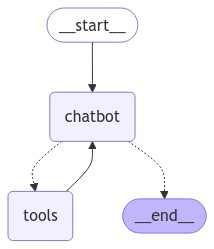

In [29]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
graph.invoke

In [ ]:
while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

In [ ]:
# Define the task for summarizing emails
summarize_articles_task = Task(
    description=(
        "Summarize the content of the fetched newsletter emails. "
        "Create a concise yet comprehensive summary highlighting the key points from each newsletter. "
        "Organize the summaries in a clear and readable format, grouping related topics if applicable. "
        "Include any important links, statistics, or data points that add value to the summary. "
        "Identify and highlight any emerging trends or significant developments across the newsletters."
    ),
    expected_output="A comprehensive and well-structured summary of the newsletter emails, including key points, trends, and important links",
    agent=summarizer_agent,
    context=[fetch_articles_task],
)

In [25]:
import os
from crewai import Agent, Task, Crew, Process

# Define the input agent to collect user's main idea
input_agent = Agent(
    role='User Input Collector',
    goal="Collect the user's main idea for the article, which is a search query for the next agent.",
    verbose=True,
    memory=True,
    backstory="You're an attentive agent responsible for understanding the user's needs."
)

# Define the summarizer agent
summary_agent = Agent(
    role='Article Summarizer',
    goal='Summarize articles into bullet points and collect them into bag_of_ideas.',
    verbose=True,
    memory=True,
    backstory=(
        "You're a concise and efficient agent, skilled at distilling long-form content "
        "into key points. Your summaries are crisp and on-point."
    )
)

# Task to get the user input
user_input_task = Task(
    description="Get the user's main idea for the article.",
    expected_output="A string representing the user's main idea.",
    agent=input_agent,  # Assign input agent here
)

# Task to search for articles using the search tool
search_task = Task(
    description="Use the search tool to find a list of articles based on the user's main idea.",
    expected_output="A list of articles relevant to the main idea.",
    tools=[gather_articles],
    agent=input_agent,  # Assign the input agent to execute the search
)

# Task to summarize each article
summarize_task = Task(
    description=(
        "Summarize each article into bullet points. "
        "Append the summarized ideas to the 'bag_of_ideas' list."
    ),
    expected_output="A final list of all summarized ideas in bag_of_ideas.",
    agent=summary_agent,  # Assign summarizer agent here
)

# Form the crew and assign the tasks sequentially
crew = Crew(
    agents=[input_agent, summary_agent],
    tasks=[user_input_task, search_task, summarize_task],
    process=Process.sequential  # Define sequential process
)

# Kick off the crew process with user input
result = crew.kickoff(inputs={'search_query': 'AI in healthcare'})
print(result)


2024-10-23 00:10:13,514 - 134038179315712 - __init__.py-__init__:538 - WARNING: Overriding of current TracerProvider is not allowed


# Agent: User Input Collector
## Task: Get the user's main idea for the article.


# Agent: User Input Collector
## Final Answer: 
The user is looking for information on the benefits of incorporating mindfulness practices into daily routines and how these practices can improve mental health and well-being.


# Agent: User Input Collector
## Task: Use the search tool to find a list of articles based on the user's main idea.


# Agent: User Input Collector
## Thought: I need to identify the user's main idea to gather relevant articles about the benefits of incorporating mindfulness practices into daily routines and their impact on mental health and well-being.
## Using tool: gather_articles
## Tool Input: 
"{\"search_query\": \"benefits of incorporating mindfulness practices into daily routines and mental health\", \"api_key\": \"your_api_key_here\"}"
## Tool Output: 
(['https://newsinhealth.nih.gov/2021/06/mindfulness-your-health', 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3679190/'